In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/10y_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:37]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [5]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8489461358313818
[[577  88]
 [ 41 148]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       665
           1       0.63      0.78      0.70       189

    accuracy                           0.85       854
   macro avg       0.78      0.83      0.80       854
weighted avg       0.87      0.85      0.85       854



In [7]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8501170960187353
[[582  83]
 [ 45 144]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       665
           1       0.63      0.76      0.69       189

    accuracy                           0.85       854
   macro avg       0.78      0.82      0.80       854
weighted avg       0.86      0.85      0.85       854



In [8]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8887587822014051
[[628  37]
 [ 58 131]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       665
           1       0.78      0.69      0.73       189

    accuracy                           0.89       854
   macro avg       0.85      0.82      0.83       854
weighted avg       0.89      0.89      0.89       854



In [9]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.892271662763466
[[617  48]
 [ 44 145]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       665
           1       0.75      0.77      0.76       189

    accuracy                           0.89       854
   macro avg       0.84      0.85      0.84       854
weighted avg       0.89      0.89      0.89       854



In [10]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8911007025761124
[[639  26]
 [ 67 122]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       665
           1       0.82      0.65      0.72       189

    accuracy                           0.89       854
   macro avg       0.86      0.80      0.83       854
weighted avg       0.89      0.89      0.89       854



In [11]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8782201405152225
[[619  46]
 [ 58 131]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       665
           1       0.74      0.69      0.72       189

    accuracy                           0.88       854
   macro avg       0.83      0.81      0.82       854
weighted avg       0.88      0.88      0.88       854



In [12]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8149882903981265
[[571  94]
 [ 64 125]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       665
           1       0.57      0.66      0.61       189

    accuracy                           0.81       854
   macro avg       0.73      0.76      0.75       854
weighted avg       0.83      0.81      0.82       854



In [13]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8969555035128806
[[641  24]
 [ 64 125]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       665
           1       0.84      0.66      0.74       189

    accuracy                           0.90       854
   macro avg       0.87      0.81      0.84       854
weighted avg       0.89      0.90      0.89       854



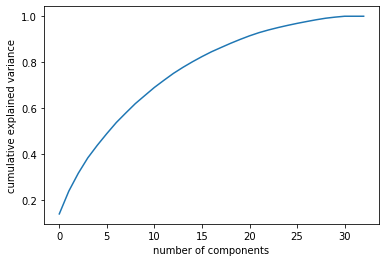

In [14]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [16]:
pca.n_components_

15

In [17]:
pca.explained_variance_ratio_

array([0.14025057, 0.09903559, 0.07801894, 0.06693573, 0.05482571,
       0.05073205, 0.04816592, 0.04164556, 0.04060766, 0.03523939,
       0.03498574, 0.03100479, 0.03001737, 0.02628293, 0.02420796])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14025057, 0.23928615, 0.31730509, 0.38424082, 0.43906653,
       0.48979858, 0.5379645 , 0.57961006, 0.62021772, 0.65545711,
       0.69044285, 0.72144764, 0.75146501, 0.77774794, 0.8019559 ])

In [19]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [20]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8384074941451991
[[570  95]
 [ 43 146]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       665
           1       0.61      0.77      0.68       189

    accuracy                           0.84       854
   macro avg       0.77      0.81      0.79       854
weighted avg       0.86      0.84      0.84       854



In [21]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.84192037470726
[[569  96]
 [ 39 150]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.89       665
           1       0.61      0.79      0.69       189

    accuracy                           0.84       854
   macro avg       0.77      0.82      0.79       854
weighted avg       0.86      0.84      0.85       854



In [22]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8770491803278688
[[589  76]
 [ 29 160]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       665
           1       0.68      0.85      0.75       189

    accuracy                           0.88       854
   macro avg       0.82      0.87      0.84       854
weighted avg       0.89      0.88      0.88       854



In [23]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8384074941451991
[[580  85]
 [ 53 136]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       665
           1       0.62      0.72      0.66       189

    accuracy                           0.84       854
   macro avg       0.77      0.80      0.78       854
weighted avg       0.85      0.84      0.84       854



In [24]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7704918032786885
[[488 177]
 [ 19 170]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       665
           1       0.49      0.90      0.63       189

    accuracy                           0.77       854
   macro avg       0.73      0.82      0.73       854
weighted avg       0.86      0.77      0.79       854



In [25]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7540983606557377
[[473 192]
 [ 18 171]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       665
           1       0.47      0.90      0.62       189

    accuracy                           0.75       854
   macro avg       0.72      0.81      0.72       854
weighted avg       0.85      0.75      0.77       854



In [26]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7822014051522248
[[530 135]
 [ 51 138]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       665
           1       0.51      0.73      0.60       189

    accuracy                           0.78       854
   macro avg       0.71      0.76      0.72       854
weighted avg       0.82      0.78      0.79       854



In [27]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8770491803278688
[[593  72]
 [ 33 156]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       665
           1       0.68      0.83      0.75       189

    accuracy                           0.88       854
   macro avg       0.82      0.86      0.83       854
weighted avg       0.89      0.88      0.88       854

